In [1]:
import pandas as pd
from datetime import datetime
from zoe import cases, query, pickle, find_previous, plot_study, plot_study_evolution

In [2]:
uk_active_cases = query("SELECT * FROM uk_active_cases", index='date')
uk_active_cases.index = pd.to_datetime(uk_active_cases.index, format='%Y%m%d')
uk_active_cases

,cartodb_id,the_geom,the_geom_webmercator,corrected_covid_positive
date,,,,
2020-06-12,37753,None,None,85829.190016
2020-06-13,37754,None,None,79740.935878
2020-06-14,37755,None,None,74085.746795
2020-06-15,37756,None,None,68758.596689
2020-06-16,37757,None,None,64013.637417
...,...,...,...,...
2021-03-08,38022,None,None,118800.497849
2021-03-09,38023,None,None,114762.120905
2021-03-10,38024,None,None,110627.271054


In [3]:
curr_date = uk_active_cases.index.max()
print(pickle(uk_active_cases, 'uk_active_cases', curr_date))

/Users/chris/coronavirus/data/zoe_uk_active_cases_2021-03-12_2021-03-12-17-30.pickle


In [4]:
prev_date, prev_uk_active_cases = find_previous(curr_date)

/Users/chris/coronavirus/data/zoe_uk_active_cases_2021-03-11_2021-03-11-17-13.pickle


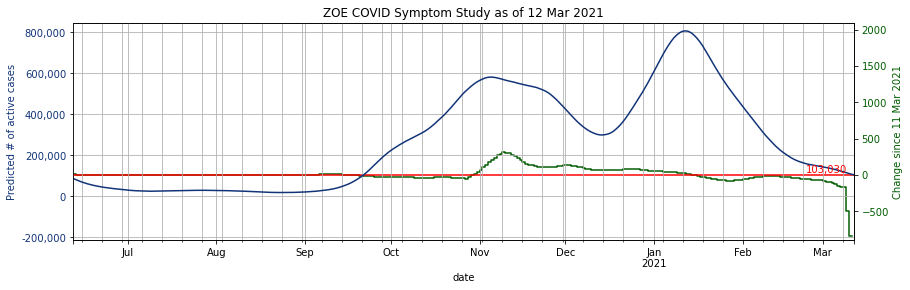

In [5]:
plot_study(curr_date, prev_date, uk_active_cases, prev_uk_active_cases)

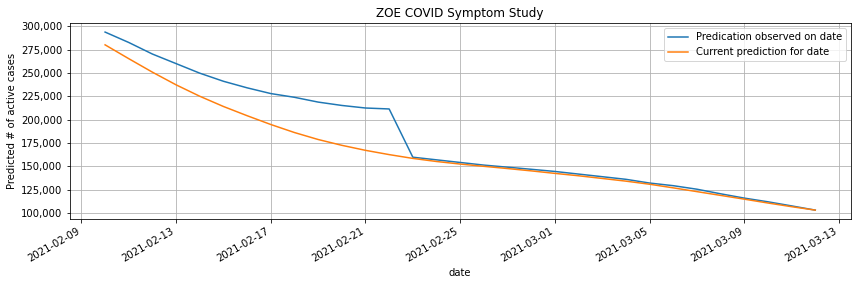

In [6]:
plot_study_evolution(curr_date, days=30)

In [7]:
prevalence_map = query("SELECT * FROM prevalence_map")
prevalence_map['percentage'] = prevalence_map['percentage'].astype(float)

In [8]:
for_date, = prevalence_map['data_status'].unique()
print(pickle(prevalence_map, 'prevalence_map', datetime.strptime(for_date, '%H:%M:%S %d-%m-%Y')))

/Users/chris/coronavirus/data/zoe_prevalence_map_2021-03-12_2021-03-12-17-30.pickle


In [9]:
prevalence_map[['lad16nm', 'lad16cd', 'percentage']].sort_values('percentage', ascending=False)[:10]

,lad16nm,lad16cd,percentage
268,Oldham,E08000004,0.891593
280,Doncaster,E08000017,0.885789
65,Amber Valley,E07000032,0.816467
70,North East Derbyshire,E07000038,0.808034
25,Leicester,E06000016,0.759212
161,East Lindsey,E07000137,0.743043
274,Wigan,E08000010,0.664276
240,Rotherham,E08000018,0.604741
301,Calderdale,E08000033,0.585198
232,Welwyn Hatfield,E07000241,0.578687
